In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()

1. Transform from data axes to principal axes is called affine transformation (translation, rotation, numerical scaling)
2. Using PCA for dimensionality reduction eliminates some of the *smallest* principal components to reduce the dimension of the projection of data while **preserving maximal variance**
3. PCA can be used to **filter noise** so that estimators can train on *low*-dimensional data
4. PCA can be thought of as a process of choosing **optimal basis functions**, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.  
  
## Advantages
1. **Dimensionality reduction**
2. Noise filtering
3. Feature selection within high dimensional data
4. Visualise data
  
## Uses of PCA
1. Visualise the relationship between two points (refer to *digits* below)
2. Understand the main variance of the data (refer to *eigenfaces* below)
3. Understand the intrinsic dimensionality to determine the number of components to include (refer to cumulative explained variance curve below)

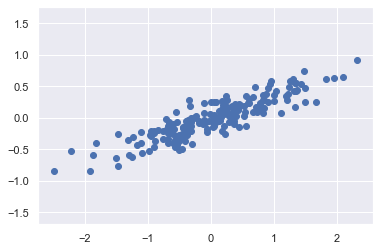

In [8]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
print(*pca.components_)
print(pca.explained_variance_)

[-0.94446029 -0.32862557] [-0.32862557  0.94446029]
[0.7625315 0.0184779]


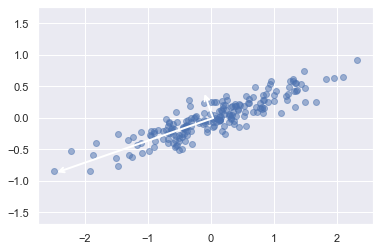

In [7]:
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = '->', linewidth = 2, shrinkA = 0, shrinkB = 0)
    ax.annotate('', v1, v0, arrowprops = arrowprops)
        
plt.scatter(X[:, 0], X[:, 1], alpha = 0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = 3 * vector * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal');

In [10]:
#Dimensionality Reduction
pca = PCA(n_components = 1)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(200, 1)


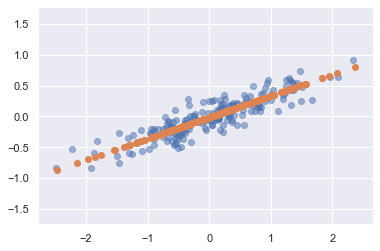

In [11]:
Xnew = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha = 0.5)
plt.scatter(Xnew[:, 0], Xnew[:, 1])
plt.axis('equal');

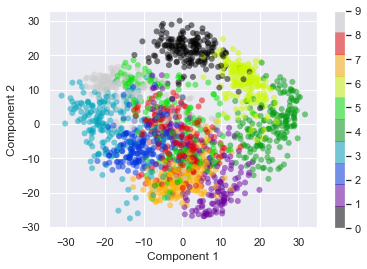

In [20]:
#Handwritten Digits
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()

pca = PCA(n_components = 2)
predicted = pca.fit_transform(digits.data)
plt.scatter(predicted[:, 0], predicted[:, 1], cmap = plt.cm.get_cmap('nipy_spectral', 10), c = digits.target
           , edgecolor = 'none', alpha = 0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

PCA discovers optimal basis functions instead of just pixel-basis function such that the amount of pixels in each component is the corollary of the orientation of vectors in the 2-dimensional example above.  
> $image(x) = mean + x_1 (basis 1) + x_2 (basis 2) + x_3 (basis 3) + \dots$

Text(0, 0.5, 'Explained Variance Ratio')

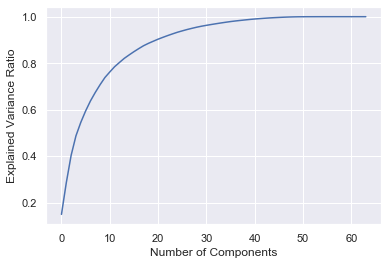

In [11]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

The curve quantifies the percentage of original variance contained by the first $N$ principal components. This curve helps us to determine the appropriate number of components to find.  
This plot helps us to understand the level of redundancy in multiple observations for *high-dimensional* data

### Noise Filtering
Any components with variance much larger than the effect of the noise should be unaffected by it

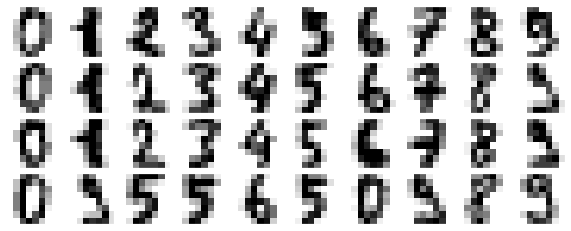

In [36]:
def plot_digits(data):
    f, axes = plt.subplots(4, 10, figsize = (10, 4), subplot_kw = {'xticks':[], 'yticks':[]},
                          gridspec_kw = dict(wspace = 0.1, hspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), interpolation = 'nearest', cmap = 'binary')
plot_digits(digits.data)

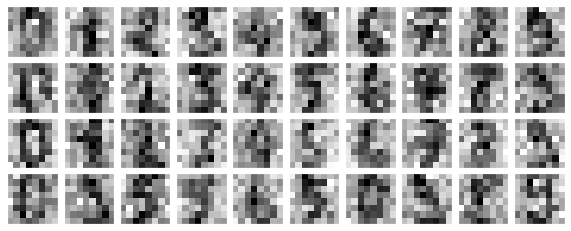

In [37]:
#Add noise
np.random.seed(0)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

5


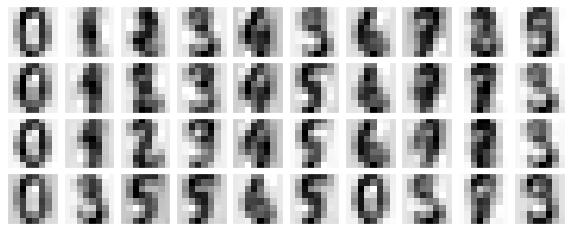

In [38]:
#Filter data by building a projection that retains 50% of the original variance
pca = PCA(0.50).fit(digits.data)
components = pca.transform(digits.data)
print(pca.n_components_)

filtered = pca.inverse_transform(components)
plot_digits(filtered)

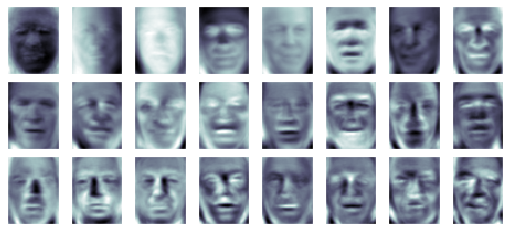

In [2]:
#Eigenfaces: images associated with the first several principal components (eignevectors)
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
faces = fetch_lfw_people(min_faces_per_person = 60)

pca = PCA(n_components = 150).fit(faces.data)
f, axes = plt.subplots(3, 8, figsize = (9, 4), subplot_kw = {'xticks':[], 'yticks':[]},
                      gridspec_kw = dict(wspace = 0.1, hspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap = 'bone')

Text(0, 0.5, 'Cumulative Explained Variance')

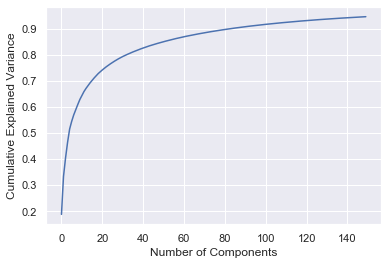

In [3]:
#See how much information is preserved by the projection
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

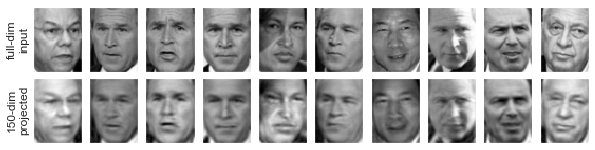

In [5]:
#Reconstruct the faces
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

f, axes = plt.subplots(2, 10, figsize = (10, 2.5), subplot_kw = {'xticks':[], 'yticks':[]},
                     gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i in range(10):
    axes[0, i].imshow(faces.data[i].reshape(62, 47), cmap = 'binary_r')
    axes[1, i].imshow(projected[i].reshape(62, 47), cmap = 'binary_r')
axes[0, 0].set_ylabel('full-dim\ninput')
axes[1, 0].set_ylabel('150-dim\nprojected');